In [1]:
import matplotlib
import pandas
import seaborn

# Количество установок приложения по неделям

<AxesSubplot:xlabel='week_number', ylabel='installs'>

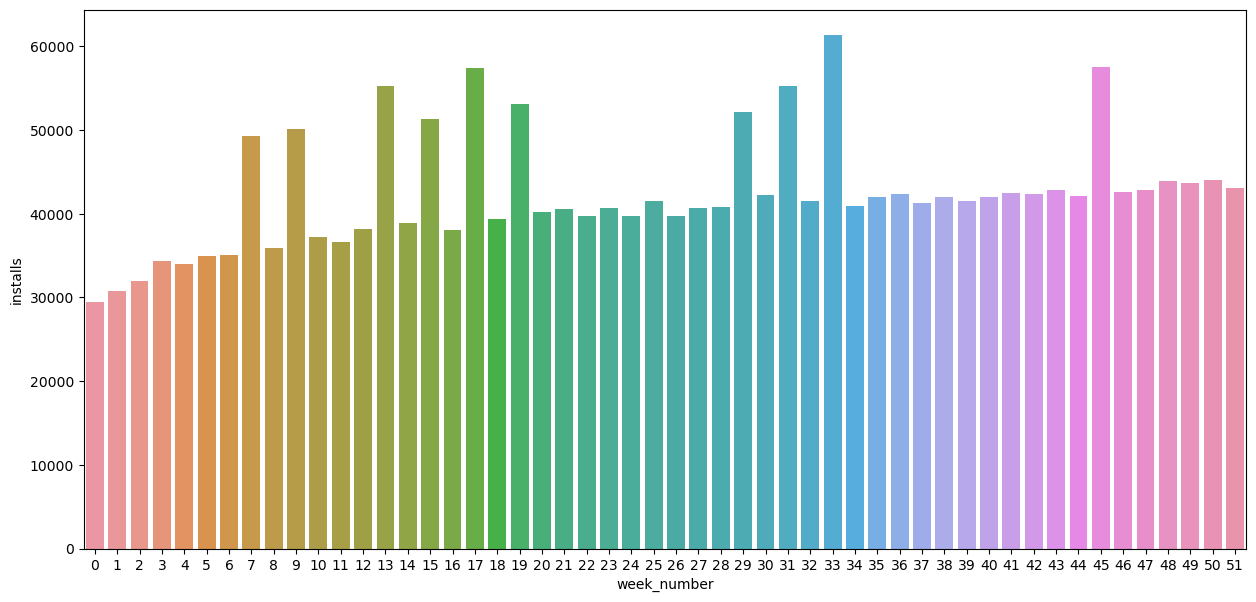

In [3]:
matplotlib.rcParams['figure.figsize'] = [15, 7]

data = pandas.read_csv('/Users/katy/Desktop/app_stats.csv')
seaborn.barplot(x = data['week_number'], y = data['installs'])

# Связь пиков на графике с рекламными кампаниями

<AxesSubplot:xlabel='week_number', ylabel='ad_campaign'>

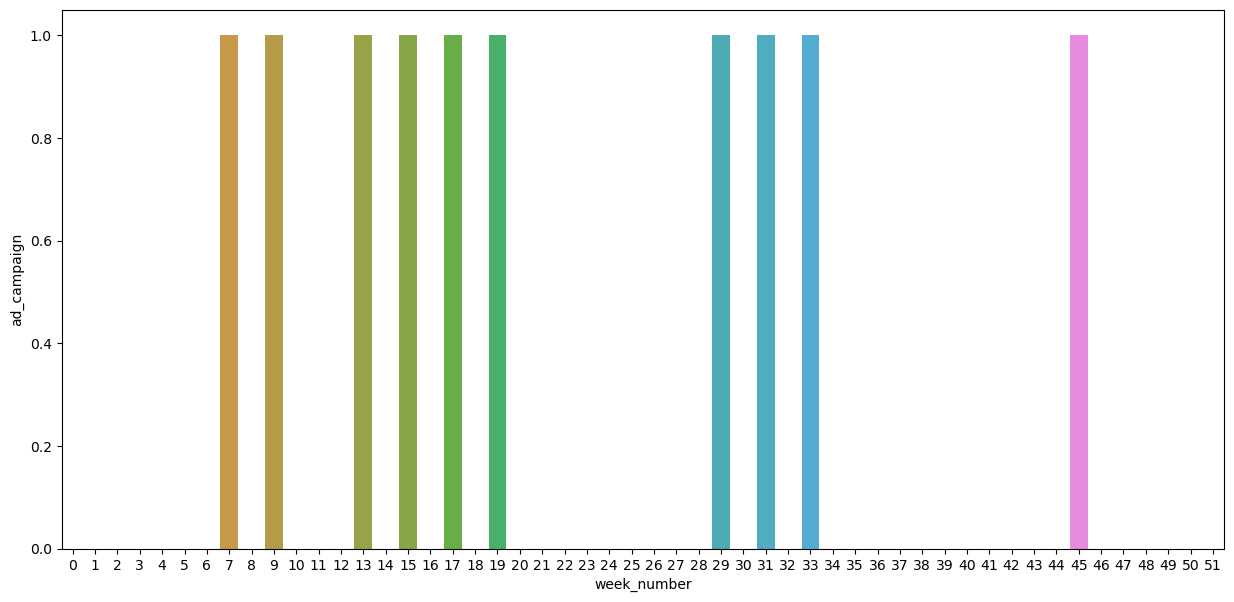

In [6]:
seaborn.barplot(x = data['week_number'], y = data['ad_campaign'])

# Платежи

<AxesSubplot:xlabel='week_number', ylabel='payments'>

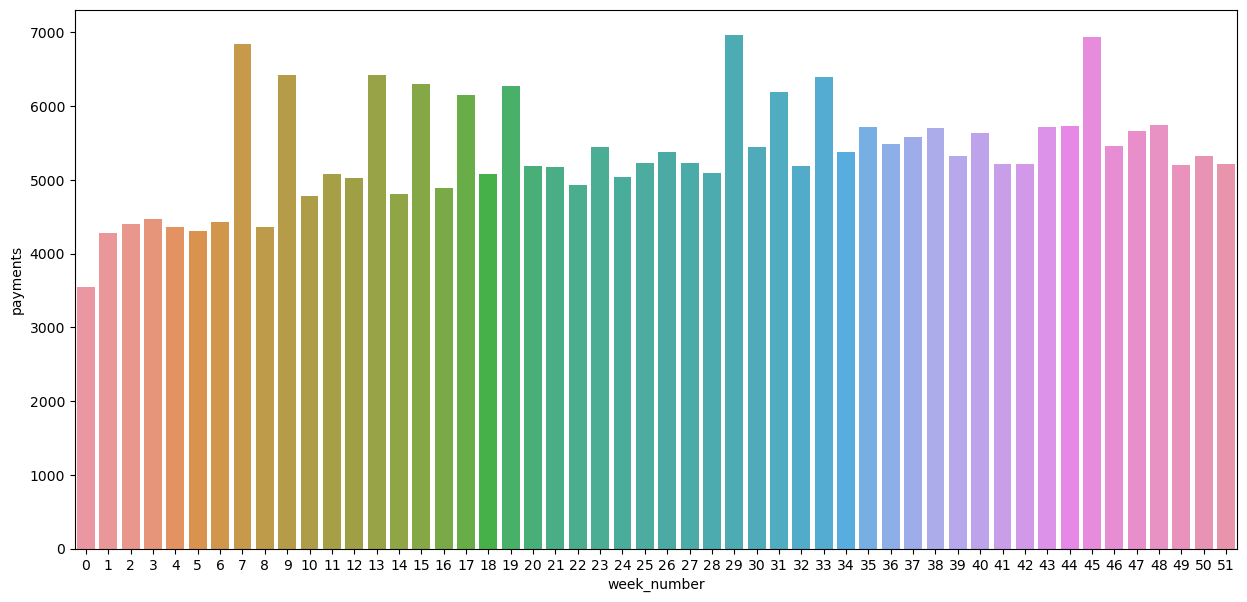

In [7]:
seaborn.barplot(x = data['week_number'], y = data['payments'])

# Конверсия по неделям

<AxesSubplot:xlabel='week_number'>

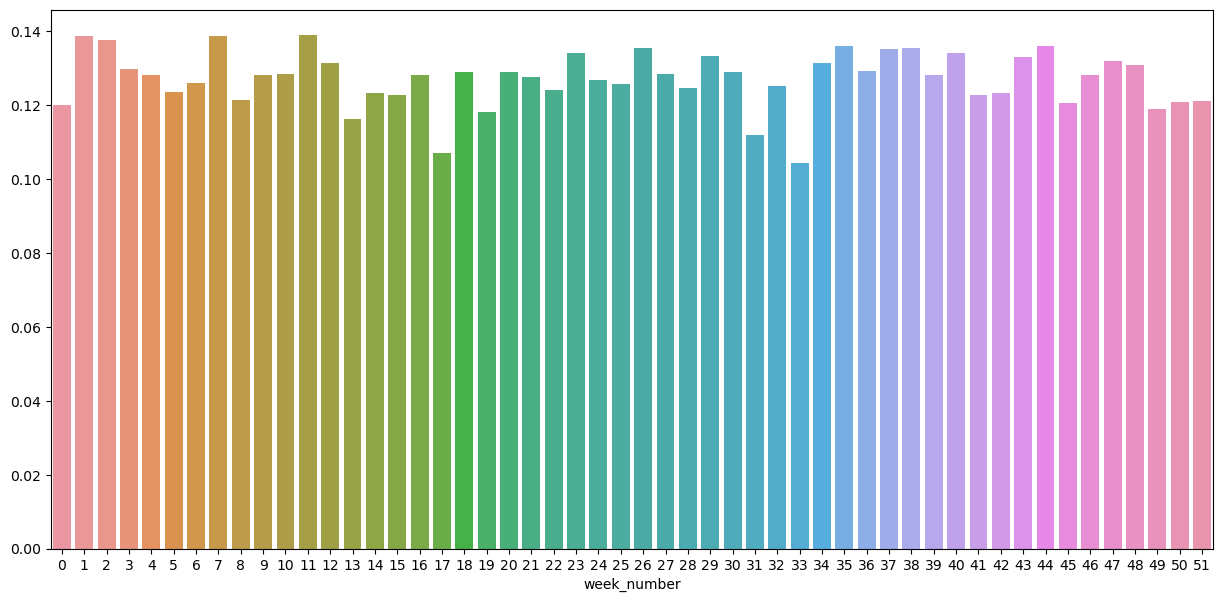

In [8]:
conversions = data['payments'] / data['installs']
seaborn.barplot(x = data['week_number'], y = conversions)

Чтобы посчитать окупаемость рекламных кампаний, нужно учитывать при расчёте конверсии не всех пользователей, а только тех, кто установил приложение благодаря рекламе.


In [10]:
campaign_weeks = [7, 9, 13, 15, 17, 19, 29, 31, 33, 45] #рекламные

diff_installs = data['installs'].diff() 
installs_from_ads = diff_installs[campaign_weeks]
print(installs_from_ads)

7     14178.0
9     14213.0
13    17028.0
15    12384.0
17    19370.0
19    13768.0
29    11324.0
31    13020.0
33    19840.0
45    15429.0
Name: installs, dtype: float64


# Количество «рекламных» покупок

In [11]:
diff_payments = data['payments'].diff()
payments_from_ads = diff_payments[campaign_weeks]
print(payments_from_ads)

7     2409.0
9     2060.0
13    1395.0
15    1495.0
17    1262.0
19    1192.0
29    1870.0
31     743.0
33    1207.0
45    1207.0
Name: payments, dtype: float64


In [13]:
conversions_from_ads = payments_from_ads / installs_from_ads #норм конверсия
print(conversions_from_ads)

7     0.169911
9     0.144938
13    0.081924
15    0.120720
17    0.065152
19    0.086578
29    0.165136
31    0.057066
33    0.060837
45    0.078229
dtype: float64


In [14]:
ads_install_average_profit = conversions_from_ads * 600
print(ads_install_average_profit)

7     101.946678
9      86.962640
13     49.154334
15     72.432171
17     39.091378
19     51.946543
29     99.081597
31     34.239631
33     36.502016
45     46.937585
dtype: float64


<AxesSubplot:>

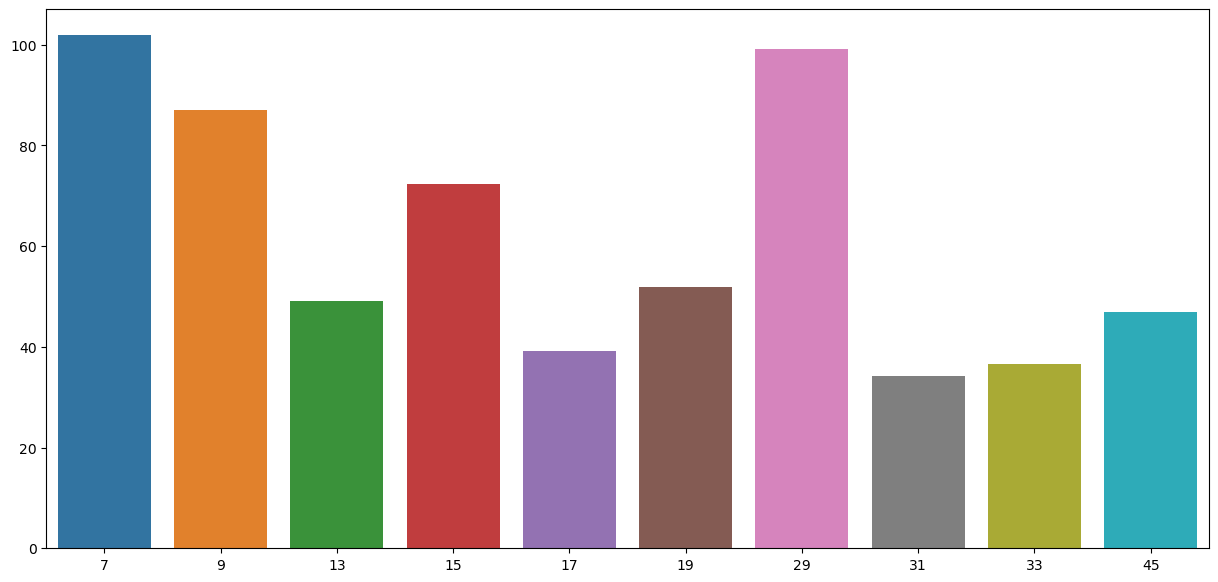

In [15]:
seaborn.barplot(x = campaign_weeks , y = ads_install_average_profit)

Одна рекламная установка обходится в 60 рублей => для окупаемости она должна приносить больше этой суммы. Лишь 4/10 рекламных кампании преодолели этот барьер. 